#### Importing Dependacies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras import Sequential

#### Dataset Download

In [2]:
dataset_url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True) 

In [3]:
data_dir 

'.\\datasets\\flower_photos'

In [4]:
import pathlib  
# to convert the string path to a windows path 
data_dir = pathlib.Path(data_dir)
data_dir 

WindowsPath('datasets/flower_photos')

In [5]:
# to get all image paths 
list(data_dir.glob('*/*.jpg')), len(list(data_dir.glob('*/*.jpg')) ) 

([WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
  WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
  WindowsPath('datasets/flower_

In [6]:
# to categorize the images by their labels
roses = list(data_dir.glob('roses/*'))
daisies = list(data_dir.glob('daisy/*'))
dandelions = list(data_dir.glob('dandelion/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))

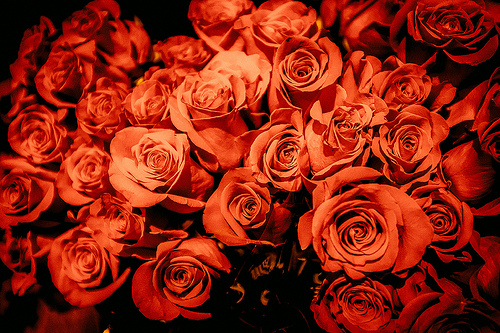

In [7]:
# rose image
PIL.Image.open(str(roses[2])) 

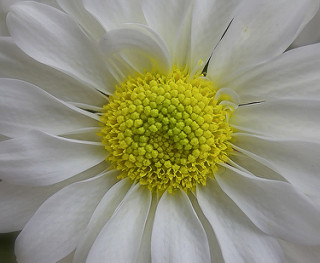

In [8]:
# image of a daisy
PIL.Image.open(str(daisies[0])) 

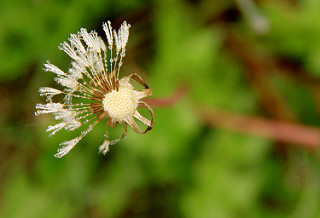

In [9]:
# image of a dandelion
PIL.Image.open(str(dandelions[1]))

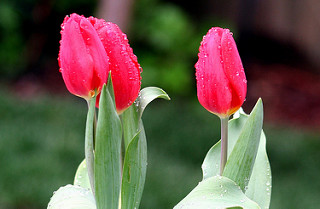

In [10]:
# image of a tulip
PIL.Image.open(str(tulips[0]))

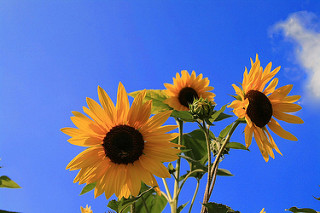

In [11]:
# image of a sunflower
PIL.Image.open(str(sunflowers[10])) 

In [12]:
# flower dictionary
flower_images_dict = {
    'roses': roses,
    'daisy': daisies,
    'dandelion': dandelions,
    'sunflowers': sunflowers,
    'tulips': tulips
}

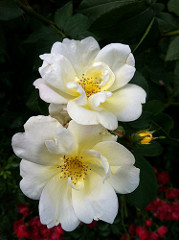

In [13]:
flower_images_dict['roses']
PIL.Image.open(str(flower_images_dict['roses'][0]))  

In [14]:
# flower labels dictionary
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [15]:
# to get the size of an image
img = cv2.imread(flower_images_dict['daisy'][0]) 
img.shape 

(263, 320, 3)

In [16]:
# to convert an to size (180,180,3)
cv2.resize(img, (180,180)).shape 

(180, 180, 3)

In [17]:
# declare X and y as empty arrays
X,y = [], []

# add values to the X and y
for flower_name, images in flower_images_dict.items(): 
    for image in images: 
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name]) 

In [18]:
X[0].shape 

(180, 180, 3)

In [19]:
y[0]

0

In [20]:
X = np.array(X) 
y = np.array(y)

print(X[0])
print(y[0]) 

[[[ 1 16  7]
  [ 1 16  7]
  [ 1 17  9]
  ...
  [23 50 31]
  [25 51 32]
  [26 52 33]]

 [[10 23 15]
  [10 23 15]
  [ 9 22 14]
  ...
  [20 44 30]
  [23 47 33]
  [26 50 36]]

 [[13 20 13]
  [12 20 13]
  [11 19 12]
  ...
  [21 43 30]
  [22 45 31]
  [25 48 34]]

 ...

 [[12 24 18]
  [11 22 15]
  [12 21 11]
  ...
  [ 7 14  7]
  [ 2  8  2]
  [ 0  2  0]]

 [[19 30 28]
  [16 26 21]
  [14 22 15]
  ...
  [ 3 12  2]
  [ 0  8  1]
  [ 0  6  1]]

 [[11 21 20]
  [17 25 24]
  [21 28 23]
  ...
  [ 1 12  2]
  [ 2 10  3]
  [ 3 10  4]]]
0


In [21]:
# train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15) 

array = [X_train, X_test, y_train, y_test]

for i in array: 
    print(f'{len(i)}')

2936
734
2936
734


In [22]:
X_train[0] 

array([[[47, 86, 69],
        [50, 91, 75],
        [53, 95, 82],
        ...,
        [27, 41, 35],
        [28, 42, 36],
        [28, 42, 36]],

       [[44, 80, 64],
        [47, 84, 69],
        [52, 88, 74],
        ...,
        [26, 41, 34],
        [27, 41, 35],
        [27, 41, 35]],

       [[38, 74, 58],
        [41, 78, 62],
        [45, 82, 66],
        ...,
        [27, 41, 35],
        [28, 42, 36],
        [27, 41, 35]],

       ...,

       [[30, 42, 36],
        [29, 41, 35],
        [29, 41, 35],
        ...,
        [31, 52, 44],
        [32, 51, 44],
        [30, 54, 42]],

       [[30, 42, 36],
        [30, 42, 36],
        [29, 41, 35],
        ...,
        [30, 51, 43],
        [32, 51, 42],
        [30, 54, 42]],

       [[30, 42, 36],
        [30, 42, 36],
        [29, 41, 35],
        ...,
        [30, 48, 41],
        [31, 51, 42],
        [31, 53, 41]]], dtype=uint8)

In [23]:
y_train[0] 

1

In [24]:
# now lets normalized the X_train and X_test values
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
X_train_scaled[0] 

array([[[0.18431373, 0.3372549 , 0.27058824],
        [0.19607843, 0.35686275, 0.29411765],
        [0.20784314, 0.37254902, 0.32156863],
        ...,
        [0.10588235, 0.16078431, 0.1372549 ],
        [0.10980392, 0.16470588, 0.14117647],
        [0.10980392, 0.16470588, 0.14117647]],

       [[0.17254902, 0.31372549, 0.25098039],
        [0.18431373, 0.32941176, 0.27058824],
        [0.20392157, 0.34509804, 0.29019608],
        ...,
        [0.10196078, 0.16078431, 0.13333333],
        [0.10588235, 0.16078431, 0.1372549 ],
        [0.10588235, 0.16078431, 0.1372549 ]],

       [[0.14901961, 0.29019608, 0.22745098],
        [0.16078431, 0.30588235, 0.24313725],
        [0.17647059, 0.32156863, 0.25882353],
        ...,
        [0.10588235, 0.16078431, 0.1372549 ],
        [0.10980392, 0.16470588, 0.14117647],
        [0.10588235, 0.16078431, 0.1372549 ]],

       ...,

       [[0.11764706, 0.16470588, 0.14117647],
        [0.11372549, 0.16078431, 0.1372549 ],
        [0.11372549, 0

#### Model Building 

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# pretrained mobilenetv2 model without top classification layer
mobilenetv2_model = MobileNetV2(
    input_shape=(180,180,3), 
    include_top=False,
    weights='imagenet'
)

mobilenetv2_model.trainable = False    # freeze the model initially

# Building the complete model 
cnn = Sequential([
    # Data augmentation 
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical', input_shape=(180,180,3)), 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
    
    # MobilenetV2
    mobilenetv2_model,
    
    # classification layers
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.2),
    
    layers.Dense(5, activation='softmax')    # 5 neurons for 5 flower classes
    
])

# 1st phase of compiling
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# train the top layers of model
cnn.fit(X_train_scaled, y_train, epochs=30, validation_split=0.2, batch_size=16)

# unfreeze the top 50 layers of the mobilenetv2 model
fine_tune_at = len(mobilenetv2_model.layers) - 50
mobilenetv2_model.trainable = True
for layer in mobilenetv2_model.layers[:fine_tune_at]:
    layer.trainable = False
    
# recomplile with a lower training rate for fine tuning
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-15),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1) 
    
]

cnn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, batch_size=16, callbacks=callbacks)  



Epoch 1/30
147/147 [==============================] - 34s 124ms/step - loss: 1.0602 - accuracy: 0.5963 - val_loss: 0.7407 - val_accuracy: 0.7432
Epoch 2/30
147/147 [==============================] - 16s 110ms/step - loss: 0.6995 - accuracy: 0.7491 - val_loss: 0.6146 - val_accuracy: 0.7874
Epoch 3/30
147/147 [==============================] - 16s 110ms/step - loss: 0.6185 - accuracy: 0.7905 - val_loss: 0.5474 - val_accuracy: 0.8044
Epoch 4/30
147/147 [==============================] - 16s 109ms/step - loss: 0.5420 - accuracy: 0.8143 - val_loss: 0.5760 - val_accuracy: 0.8061
Epoch 5/30
147/147 [==============================] - 16s 110ms/step - loss: 0.5278 - accuracy: 0.8250 - val_loss: 0.5922 - val_accuracy: 0.7993
Epoch 6/30
147/147 [==============================] - 16s 109ms/step - loss: 0.4932 - accuracy: 0.8284 - val_loss: 0.5958 - val_accuracy: 0.8078
Epoch 7/30
147/147 [==============================] - 18s 122ms/step - loss: 0.4403 - accuracy: 0.8548 - val_loss: 0.5524 - val_ac

In [30]:
cnn.evaluate(X_test_scaled, y_test) 

23/23 [==============================] - 1s 33ms/step - loss: 0.6129 - accuracy: 0.8420


[0.6129136085510254, 0.8419618606567383]

In [31]:
y_test[0]

4

In [37]:
predictions = cnn.predict(X_test_scaled)

score = tf.nn.softmax(predictions)
score[:10] 

score[0] 

y_pred = [np.argmax(i) for i in score] 
y_pred[:10] 

23/23 [==============================] - 1s 32ms/step


[4, 3, 4, 4, 2, 2, 3, 2, 4, 2]

In [38]:
y_pred[0]

4

In [39]:
y_test[1], y_pred[1] 

(3, 3)

In [40]:
from sklearn.metrics import classification_report 

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       141
           1       0.92      0.74      0.82       127
           2       0.95      0.89      0.92       180
           3       0.75      0.88      0.81       119
           4       0.82      0.83      0.83       167

    accuracy                           0.84       734
   macro avg       0.84      0.84      0.84       734
weighted avg       0.85      0.84      0.84       734



Text(95.72222222222221, 0.5, 'Truth')

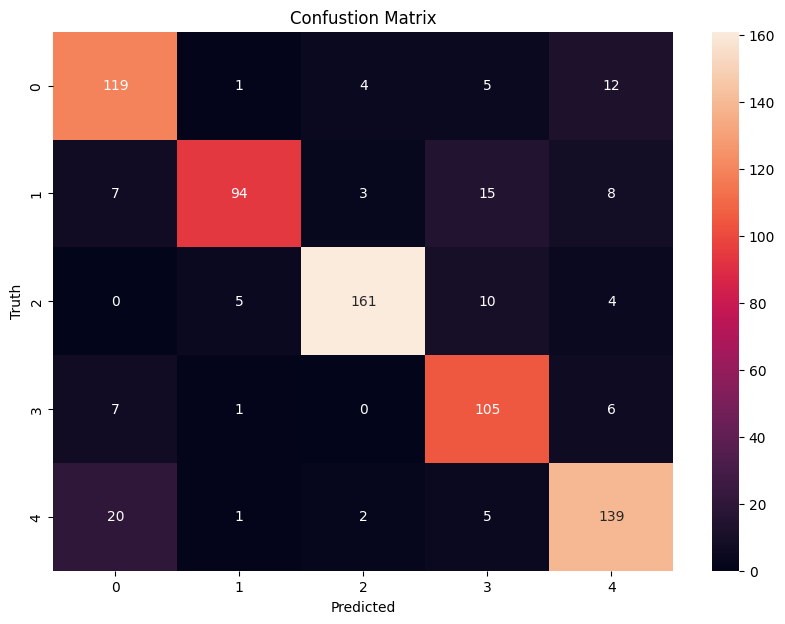

In [42]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confustion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
